In [1]:
import matplotlib.pyplot as plt
%matplotlib inline 

import numpy as np
import pandas as pd
import sklearn.linear_model

In [2]:
housing = pd.read_csv("housing.csv")
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


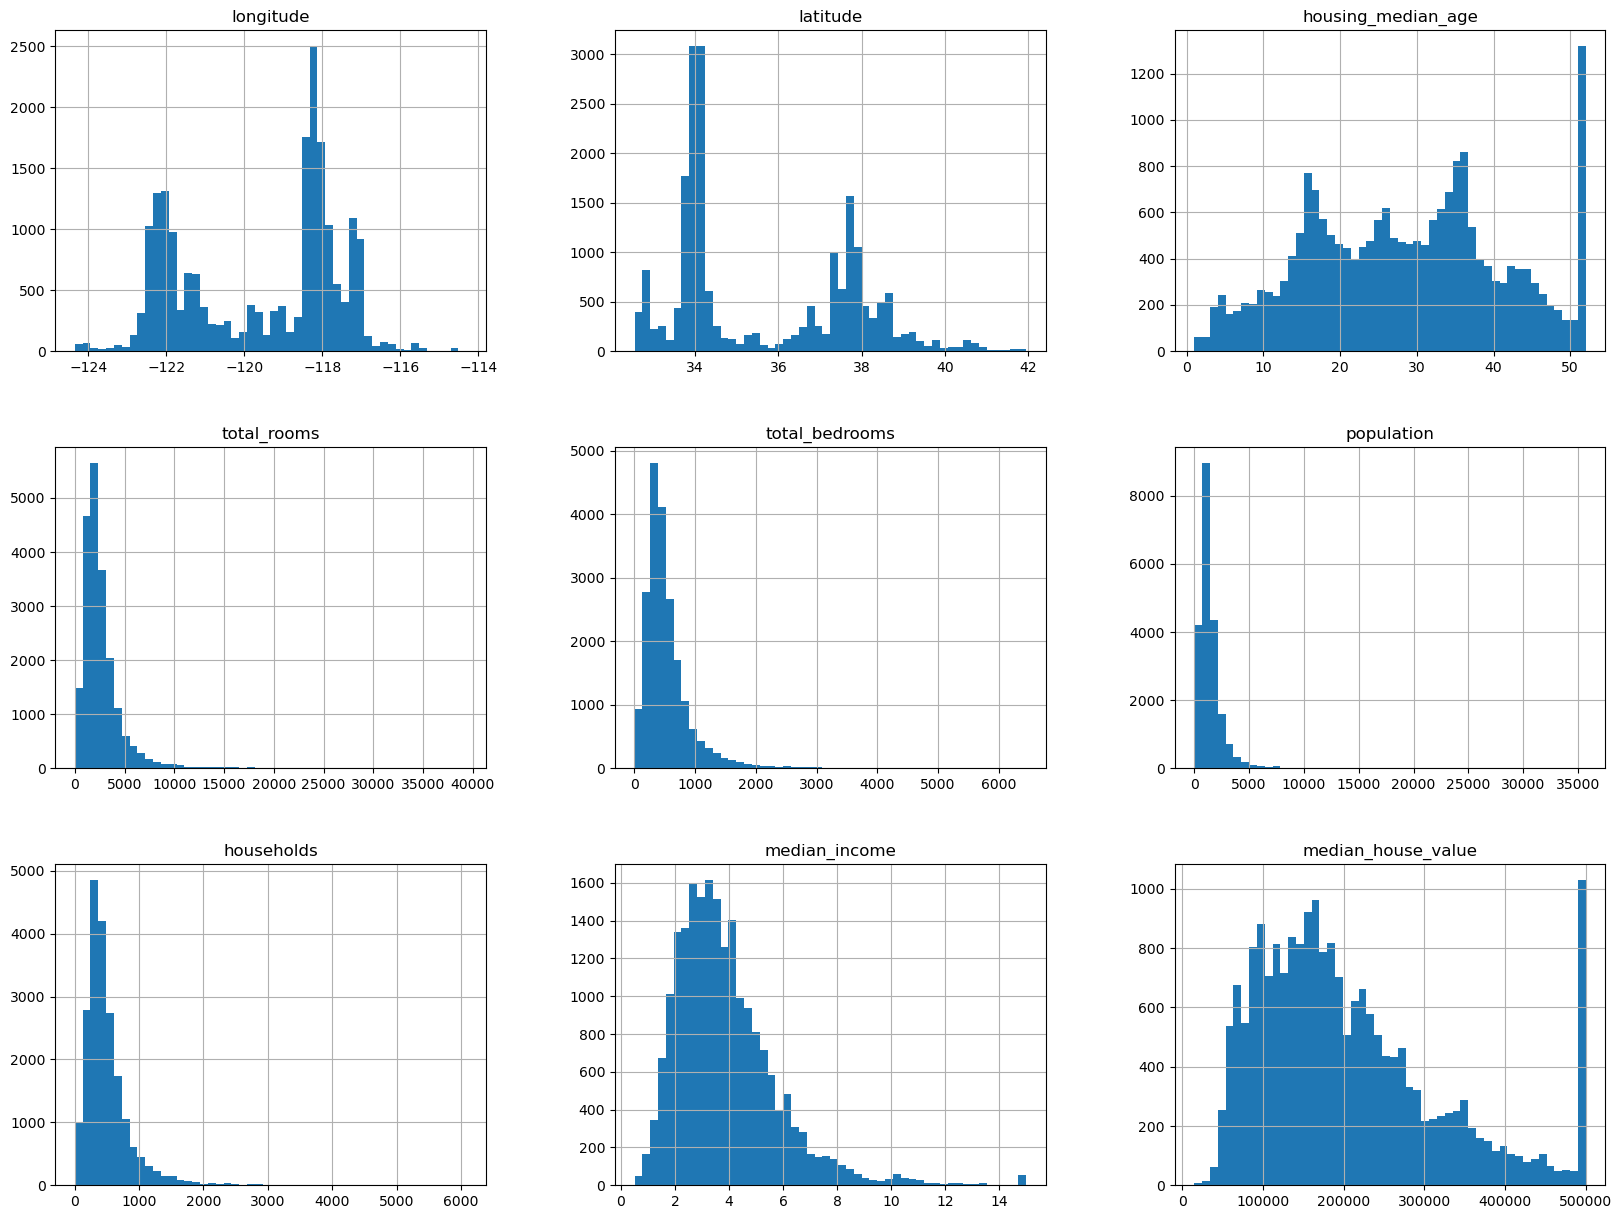

In [6]:
# adımlar 50 50 gidecek şekilde 20 ye 15 lik alanda histogram grafiklerinin çıktısı
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [7]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation (len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size] 
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [8]:
train_set, test_set = split_train_test(housing, 0.2)

In [9]:
len(train_set)

16512

In [10]:
len(test_set)

4128

In [11]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

<Axes: >

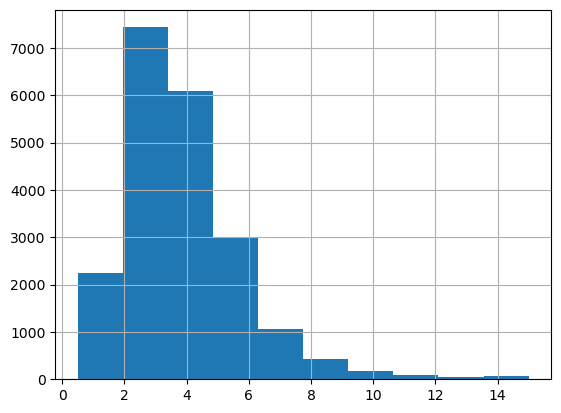

In [12]:
housing["median_income"].hist()

In [13]:
housing["income_cat"]= pd.cut(housing["median_income"],
                             bins=[0.,1.5,3.0,4.5,6., np.inf],
                              labels=[1,2,3,4,5]
                             )

<Axes: >

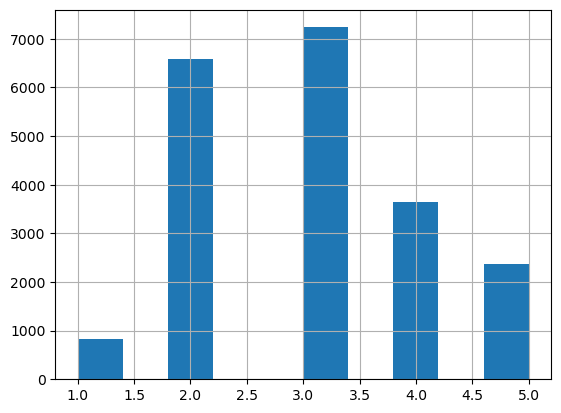

In [14]:
housing["income_cat"].hist()

In [15]:
# dengelenmiş karıştırılmış ayarlanma yapılır
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(housing, housing["income_cat"]):
    start_train_test = housing.loc[train_index]
    start_test_set = housing.loc[test_index]

In [16]:
housing['income_cat'].value_counts() / len(housing['income_cat'])

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [17]:
start_train_test['income_cat'].value_counts() / len(start_train_test)

3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: income_cat, dtype: float64

In [18]:
start_test_set['income_cat'].value_counts() / len(start_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [19]:
housing['income_cat'].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

In [20]:
for set_ in (start_train_test, start_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

<Axes: xlabel='longitude', ylabel='latitude'>

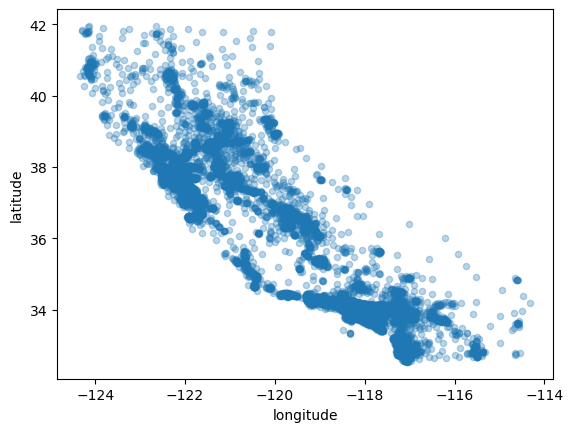

In [21]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.3)

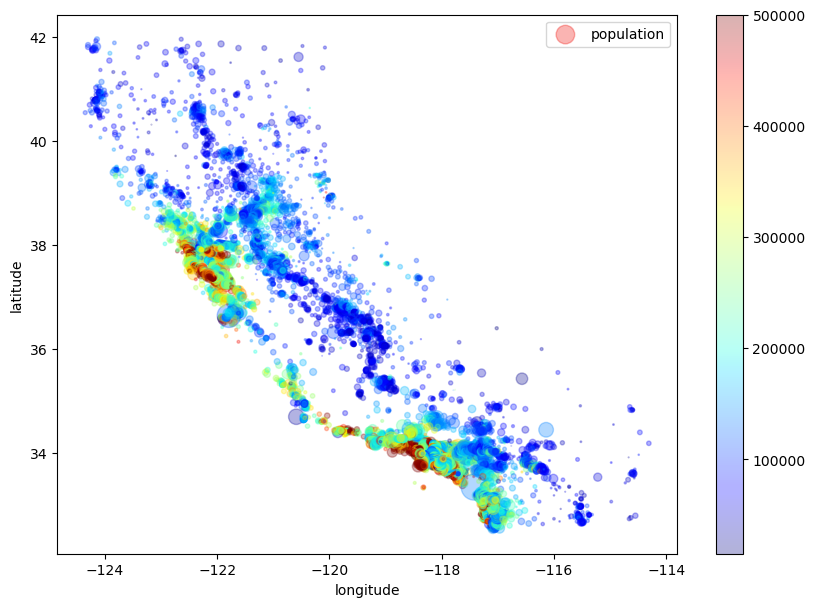

In [22]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.3,
            s=housing["population"]/100, label="population", figsize=(10,7),
            c=housing["median_house_value"], cmap= plt.get_cmap("jet"), colorbar=True)
plt.legend()

In [23]:
corr_matrix= housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

C:\Users\okang\AppData\Local\Temp\ipykernel_14200\1267472226.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix= housing.corr()


median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

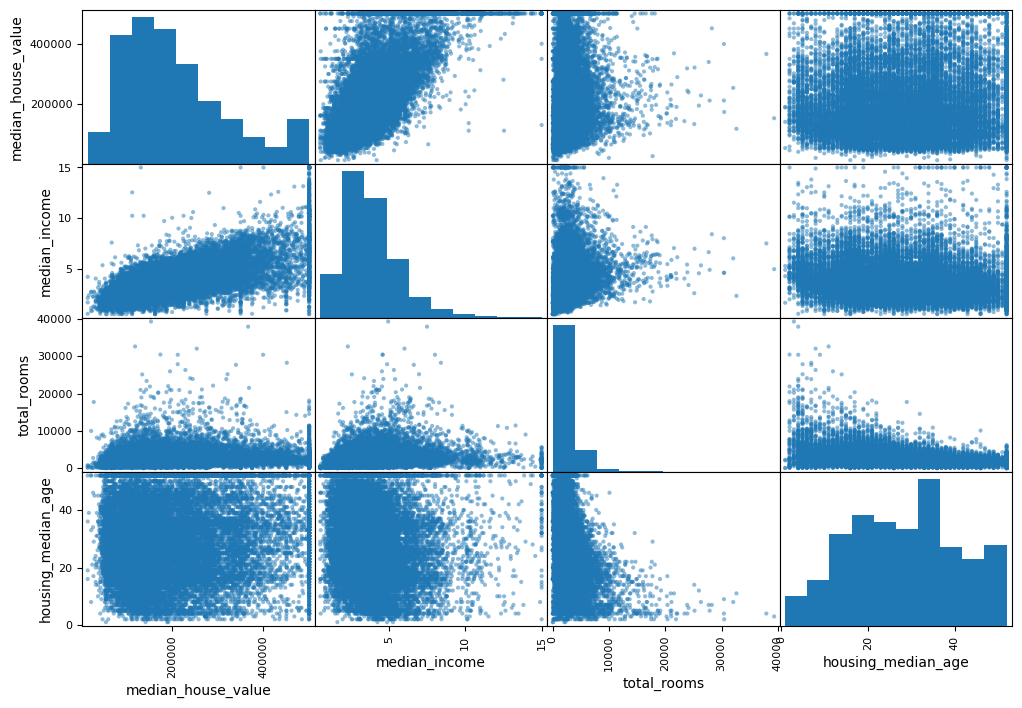

In [24]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

<Axes: xlabel='median_income', ylabel='median_house_value'>

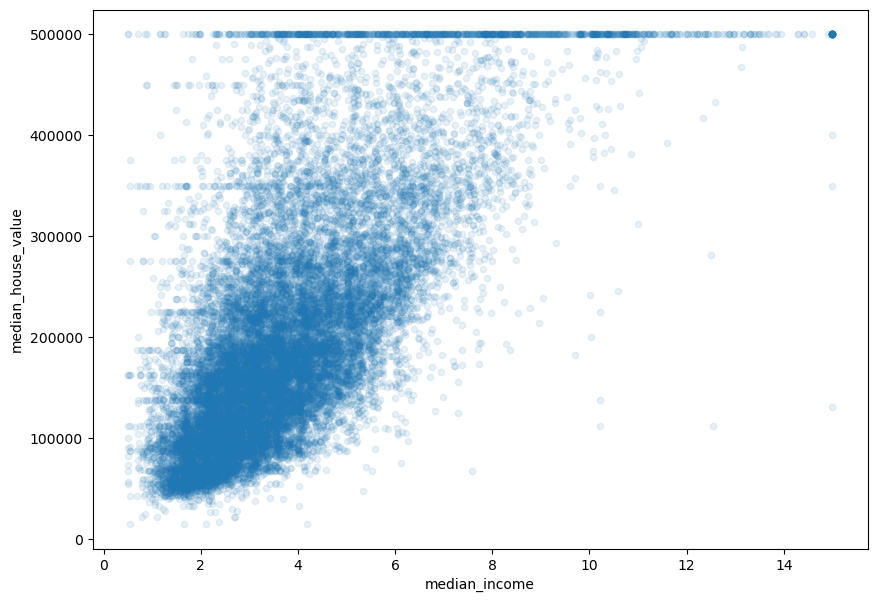

In [25]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1, figsize=(10,7))

In [26]:
housing["rooms_per_household"] = housing['total_rooms']/housing['households']
housing["bedrooms_per_room"] = housing['total_bedrooms']/housing['total_rooms']
housing["population_per_household"]= housing['population']/housing['households']

In [27]:
corr_matrix= housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

C:\Users\okang\AppData\Local\Temp\ipykernel_14200\1267472226.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix= housing.corr()


median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

Buraya Kadarki yaptığımız işlemlerde dengeli dağılan eğtim ve test verisinin önemini. Korelasyonu yükseltme yollarından biri olarak kolonları gerekli mantıklı işlemlere tabi tutup daha yüksek korelasyonlu veriler oluşturabileceğimizi gördük. Ayrıca korelasyon negatifde olsa pozitif varvsayılıp, bir ilişkiye delalet ettiğini öğrendik.

In [28]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   longitude                 20640 non-null  float64 
 1   latitude                  20640 non-null  float64 
 2   housing_median_age        20640 non-null  float64 
 3   total_rooms               20640 non-null  float64 
 4   total_bedrooms            20433 non-null  float64 
 5   population                20640 non-null  float64 
 6   households                20640 non-null  float64 
 7   median_income             20640 non-null  float64 
 8   median_house_value        20640 non-null  float64 
 9   ocean_proximity           20640 non-null  object  
 10  income_cat                20640 non-null  category
 11  rooms_per_household       20640 non-null  float64 
 12  bedrooms_per_room         20433 non-null  float64 
 13  population_per_household  20640 non-null  floa

In [29]:
housing = start_train_test.drop("median_house_value", axis=1)
housing_labels = start_train_test['median_house_value'].copy()

### Eksik Veri oldugunda
1. Eksik olan satırları silmek
2. Eksik olan özelliği tamamen silmek
3. Sabit değer vermek (median, mean, 0,1 ve benzeri)

In [30]:
housing.dropna(subset=["total_bedrooms"]) #yatak odası eksik olan stırları siler

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,<1H OCEAN
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,INLAND
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,<1H OCEAN
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,<1H OCEAN


In [31]:
housing.drop("total_bedrooms", axis=1) #belirtilen kolunu siler

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,2237.0,706.0,2.1736,INLAND
15502,-117.23,33.09,7.0,5320.0,2015.0,768.0,6.3373,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,667.0,300.0,2.8750,INLAND
14053,-117.13,32.75,24.0,1877.0,898.0,483.0,2.2264,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,1837.0,580.0,4.4964,<1H OCEAN
...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,2026.0,1001.0,5.0900,<1H OCEAN
12661,-121.42,38.51,15.0,7901.0,4769.0,1418.0,2.8139,INLAND
19263,-122.72,38.44,48.0,707.0,458.0,172.0,3.1797,<1H OCEAN
19140,-122.70,38.31,14.0,3155.0,1208.0,501.0,4.1964,<1H OCEAN


In [32]:
median = housing['total_bedrooms'].median() #ortalama yatak odası
housing['total_bedrooms'].fillna(median, inplace=True)

In [33]:
from sklearn.impute import SimpleImputer #boş verileri doldurma kütüphanesi

1. fit()
2. transform()
3. fit_transform()

In [34]:
imputer = SimpleImputer(strategy="median")

In [35]:
housing_num = housing.drop("ocean_proximity", axis=1)

In [36]:
imputer.fit(housing_num) #bütün satırlarda median göre dağılım yapılır.

SimpleImputer(strategy='median')

In [37]:
imputer.statistics_ #buradaki imputer artık bir estamitor (tahmin edici) dır 

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [38]:
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [39]:
X = imputer.transform(housing_num)#doldurduğumuz veriyi değişkene atıyoruz

In [40]:
X

array([[-1.2146e+02,  3.8520e+01,  2.9000e+01, ...,  2.2370e+03,
         7.0600e+02,  2.1736e+00],
       [-1.1723e+02,  3.3090e+01,  7.0000e+00, ...,  2.0150e+03,
         7.6800e+02,  6.3373e+00],
       [-1.1904e+02,  3.5370e+01,  4.4000e+01, ...,  6.6700e+02,
         3.0000e+02,  2.8750e+00],
       ...,
       [-1.2272e+02,  3.8440e+01,  4.8000e+01, ...,  4.5800e+02,
         1.7200e+02,  3.1797e+00],
       [-1.2270e+02,  3.8310e+01,  1.4000e+01, ...,  1.2080e+03,
         5.0100e+02,  4.1964e+00],
       [-1.2214e+02,  3.9970e+01,  2.7000e+01, ...,  6.2500e+02,
         1.9700e+02,  3.1319e+00]])

In [41]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [42]:
from sklearn.preprocessing import OrdinalEncoder #bu
ordinal_encoder = OrdinalEncoder() #bu

In [43]:
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat) #bu yanlış bir yaklaşım. Çünkü ->

In [44]:
housing_cat_encoded[:10] #Sayısal değerler vereceği için birisi önemli bir diğeri isse önemsiz gibi olacaktır

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [45]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [46]:
from sklearn.preprocessing import OneHotEncoder

In [47]:
cat_encoder = OneHotEncoder()

In [48]:
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

In [49]:
housing_cat_1hot # sıkıştırılmış matrix şeklinde döndürür

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

## Feature Scaling

1. min/max scaling
2. Standardization

EĞİTİM -> fit -> transform <br>
TEST -> transform

In [50]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler

In [51]:
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room   #oda başına düşen yatak odası sayısı
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]  # Ev başına düşen oda 
        population_per_household = X[:, population_ix] / X[:, households_ix]  # Ev başına düşen popülasyon
        
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)


In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [53]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [54]:
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [55]:
housing_num_tr

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.01739526,
         0.00622264, -0.12112176],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.56925554,
        -0.04081077, -0.81086696],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.01802432,
        -0.07537122, -0.33827252],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.5092404 ,
        -0.03743619,  0.32286937],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.32814891,
        -0.05915604, -0.45702273],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.01407228,
         0.00657083, -0.12169672]])

In [56]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

In [57]:
#num_attribs
#cat_attribs
housing_prepared = full_pipeline.fit_transform(housing)

In [58]:
housing_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

In [59]:
from sklearn.linear_model import LinearRegression

In [60]:
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [61]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]

In [62]:
some_pred = full_pipeline.transform(some_data)

In [63]:
print("Sonuclar: ", lin_reg.predict(some_pred))

Sonuclar:  [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]


In [64]:
print("Sonuclar: ", list(some_labels))

Sonuclar:  [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [65]:
from sklearn.metrics import mean_squared_error

In [66]:
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)

In [67]:
lin_rmse

68627.87390018745

Underfiting durumu yaşandı yani daha giriş aşamasında olduça başarısız

In [68]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [69]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

Overfit -> fazla öğrenmiş gibi duran ama dışarı verisine hiçbirşey yapamayan

In [70]:
from sklearn.model_selection import cross_val_score

In [71]:
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [72]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [73]:
display_scores(tree_rmse_scores)

Scores: [71447.46811837 70166.56208468 68436.95713964 71891.23357611
 69978.78995994 76011.29960506 71207.80965561 73432.79737465
 69033.54118922 70971.96668855]
Mean: 71257.84253918153
Standard deviation: 2087.55676412574


In [74]:
scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-scores)

In [75]:
display_scores(lin_rmse_scores)

Scores: [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean: 69104.07998247063
Standard deviation: 2880.328209818069


In [76]:
from sklearn.ensemble import RandomForestRegressor

In [77]:
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor()

In [83]:
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=1e-07, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
                      verbose=0, warm_start=False)
#Bu kullanım hatasız

RandomForestRegressor(criterion='mse', max_features='auto',
                      min_impurity_decrease=1e-07, n_estimators=10, n_jobs=1,
                      random_state=42)

In [84]:
housing_predictions = forest_reg.predict(housing_prepared)

In [85]:
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18755.84905519611

Bu noktada ovetfitting olsa bile aldığımız en düşük hatayı aldık. İnce ayar yapımına geçiyoruz
1. Izgara Taraması (Grid Search) - GridSearchCV
2. Rasgele Arama (Randomized Search)
3. Ensemle Methods

In [87]:
from sklearn.model_selection import GridSearchCV

In [88]:
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

In [89]:
forest_reg = RandomForestRegressor()

In [90]:
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

In [91]:
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [92]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

Böylece ince ayar için ne iyi parametrelerl tepit edildi

In [93]:
# refit =  True    bu ayarla en optimum sonuçla eğitim yapar

In [94]:
cvres = grid_search.cv_results_

In [97]:
# cvres
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

63625.26071674627 {'max_features': 2, 'n_estimators': 3}
55905.105230629655 {'max_features': 2, 'n_estimators': 10}
52712.7688434006 {'max_features': 2, 'n_estimators': 30}
60648.38489320941 {'max_features': 4, 'n_estimators': 3}
52855.63467782123 {'max_features': 4, 'n_estimators': 10}
50514.454265815984 {'max_features': 4, 'n_estimators': 30}
58523.816372391644 {'max_features': 6, 'n_estimators': 3}
51934.23292250013 {'max_features': 6, 'n_estimators': 10}
49998.51808364617 {'max_features': 6, 'n_estimators': 30}
58148.29101515753 {'max_features': 8, 'n_estimators': 3}
52435.89371353742 {'max_features': 8, 'n_estimators': 10}
50111.77199991083 {'max_features': 8, 'n_estimators': 30}
62026.78055574171 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54004.99789127252 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60335.92926990011 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52344.302123223926 {'bootstrap': False, 'max_features': 3, 'n_estimators':

In [102]:
feature_importances =grid_search.best_estimator_.feature_importances_

In [99]:
extra_attribs = ['rooms_per_hhold', 'pop_per_hhold', 'bedrooms_per_room']

In [100]:
cat_encoder = full_pipeline.named_transformers_['cat']
cat_one_hot_attribs = list(cat_encoder.categories_[0])

In [101]:
attributes = num_attribs + extra_attribs + cat_one_hot_attribs

In [103]:
sorted(zip(feature_importances, attributes), reverse=True)

[(0.3312740352957244, 'median_income'),
 (0.1488735356135174, 'INLAND'),
 (0.10439534962261601, 'pop_per_hhold'),
 (0.08007867557242195, 'longitude'),
 (0.07205607664869824, 'bedrooms_per_room'),
 (0.06653788231853815, 'latitude'),
 (0.06405150888160303, 'rooms_per_hhold'),
 (0.043754041367752815, 'housing_median_age'),
 (0.017625626936213265, 'total_rooms'),
 (0.017558035719707016, 'population'),
 (0.016583568181443714, 'total_bedrooms'),
 (0.01618840589843873, 'households'),
 (0.013681817963797013, '<1H OCEAN'),
 (0.005109074586713851, 'NEAR OCEAN'),
 (0.0021844316883902126, 'NEAR BAY'),
 (4.793370442431424e-05, 'ISLAND')]

In [104]:
final_model = grid_search.best_estimator_

In [105]:
X_test = start_test_set.drop('median_house_value', axis=1)
y_test = start_test_set['median_house_value'].copy()

In [106]:
X_test_prepared = full_pipeline.transform(X_test)

In [107]:
final_predictions = final_model.predict(X_test_prepared)

In [108]:
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18755.84905519611

# Güven Aralığı (confidence interval)

In [109]:
from scipy import stats

In [110]:
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2

In [111]:
np.sqrt(stats.t.interval(confidence, len(squared_errors)-1,
                        loc = squared_errors.mean(),
                        scale=stats.sem(squared_errors)))

array([45402.01381439, 49202.84000412])